# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather"
 
# Define an empty list to fetch the weather data for each city
city_data = []
 
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
 
# Create counters
record_count = 1
set_count = 1
 
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
 
    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city}&appid={weather_api_key}&units=metric"
 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
 
    # Add 1 to the record count
    record_count += 1
 
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
 
        # Append the City information into city_data list
        city_data.append({"City": city,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
 
    except:
        print("City not found. Skipping...")
        pass
 
    # Pause between API calls to avoid rate limiting
    time.sleep(1)


# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapuskasing
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | mil'kovo
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | saratamata
City not found. Skipping...
Processing Record 10 of Set 1 | constantia
Processing Record 11 of Set 1 | simpang
Processing Record 12 of Set 1 | palikir - national government center
Processing Record 13 of Set 1 | ayaguz
City not found. Skipping...
Processing Record 14 of Set 1 | al khafji
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | ampasimanolotra
City not found. Skipping...
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | taiohae
City not found

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapuskasing,49.4169,-82.4331,1.41,84,100,1.57,CA,1731618537
1,whitehorse,60.7161,-135.0538,-8.28,85,75,1.03,CA,1731618710
2,port-aux-francais,-49.3500,70.2167,2.87,80,95,11.36,TF,1731618711
3,adamstown,-25.0660,-130.1015,23.23,86,91,4.36,PN,1731618712
4,grytviken,-54.2811,-36.5092,1.93,64,54,2.89,GS,1731618713


In [8]:
# Export the City_Data into a csv
# Create output directory if it doesn't exist and export the City_Data into a csv
import os

if not os.path.exists("output_data"):
    os.makedirs("output_data")
    
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapuskasing,49.4169,-82.4331,1.41,84,100,1.57,CA,1731618537
1,whitehorse,60.7161,-135.0538,-8.28,85,75,1.03,CA,1731618710
2,port-aux-francais,-49.3500,70.2167,2.87,80,95,11.36,TF,1731618711
3,adamstown,-25.0660,-130.1015,23.23,86,91,4.36,PN,1731618712
4,grytviken,-54.2811,-36.5092,1.93,64,54,2.89,GS,1731618713


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

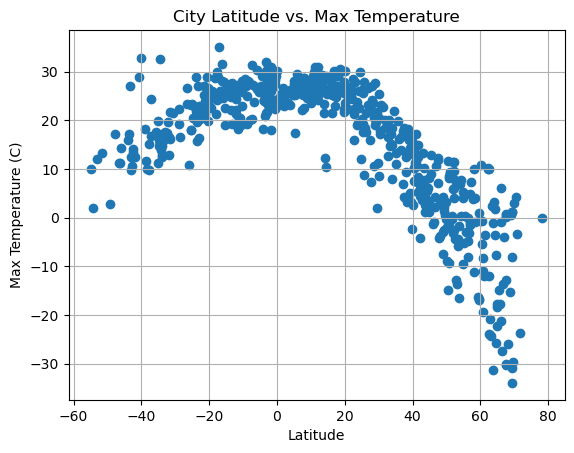

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat'].astype("float")
y_values = city_data_df['Max Temp'].astype("float")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

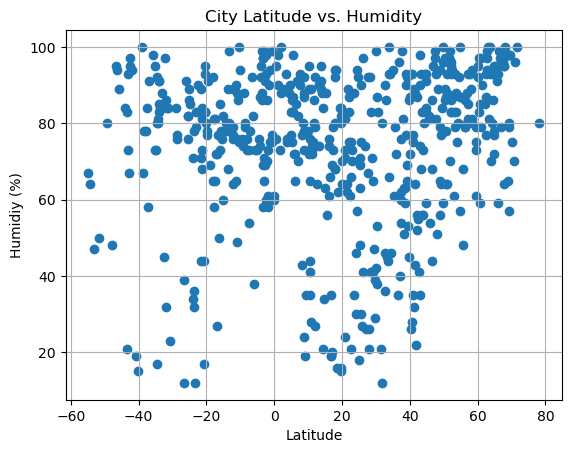

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat'].astype("float")
y_values = city_data_df['Humidity'].astype("float")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidiy (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

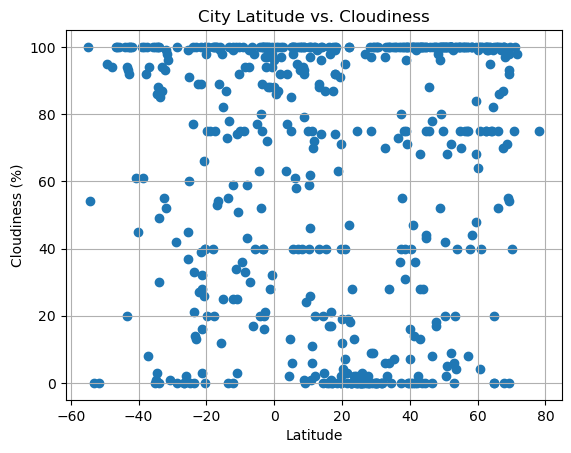

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat'].astype("float")
y_values = city_data_df['Cloudiness'].astype("float")
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

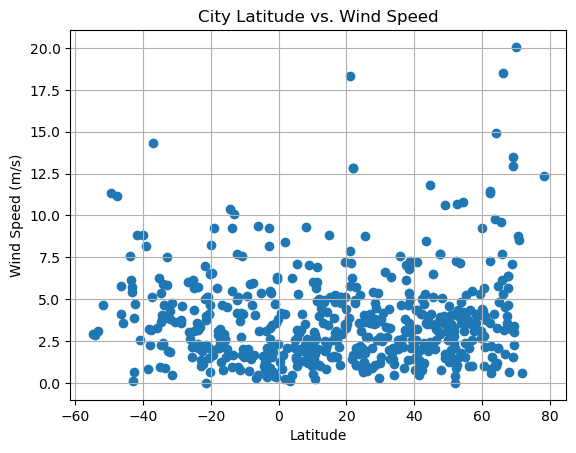

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat'].astype("float")
y_values = city_data_df['Wind Speed'].astype("float")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def lin_regress_plot (x_values, y_values, y_axis):
    
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values)
    
    # Set x coordinates for model's formula 
    if x_values.sum() > 0:
        x_coord = 5
    else:
        x_coord = -50
    
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_coord,10),fontsize=18,color="red")
    
    # Label plot
    plt.xlabel('Latitude')
    plt.ylabel(y_axis)
    
    # Print r square value
    print(f"The r-value is: {rvalue}")

    # Show plot
    return plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapuskasing,49.4169,-82.4331,1.41,84,100,1.57,CA,1731618537
1,whitehorse,60.7161,-135.0538,-8.28,85,75,1.03,CA,1731618710
5,mil'kovo,55.6078,37.7956,0.35,48,100,3.83,RU,1731618714
8,constantia,44.1833,28.6500,5.39,80,100,1.91,RO,1731618627
10,palikir - national government center,6.9248,158.1611,28.47,70,100,4.12,FM,1731618721


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,2.87,80,95,11.36,TF,1731618711
3,adamstown,-25.0660,-130.1015,23.23,86,91,4.36,PN,1731618712
4,grytviken,-54.2811,-36.5092,1.93,64,54,2.89,GS,1731618713
6,puerto ayora,-0.7393,-90.3518,24.19,76,100,3.58,EC,1731618715
7,waitangi,-43.9535,-176.5597,16.01,84,100,7.60,NZ,1731618717


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8704034789274848


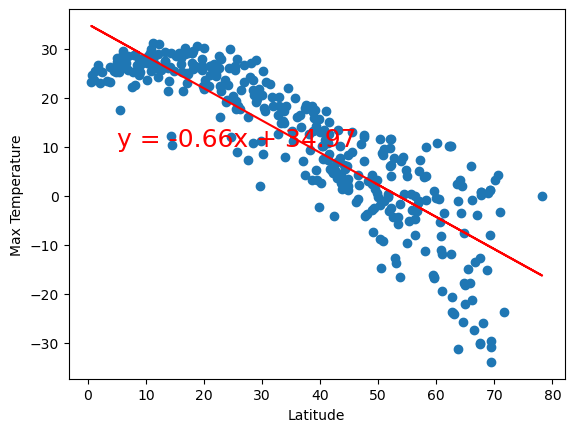

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
y_axis = 'Max Temperature'

lin_regress_plot(x_values,y_values, y_axis)

The r-value is: 0.6886176462895409


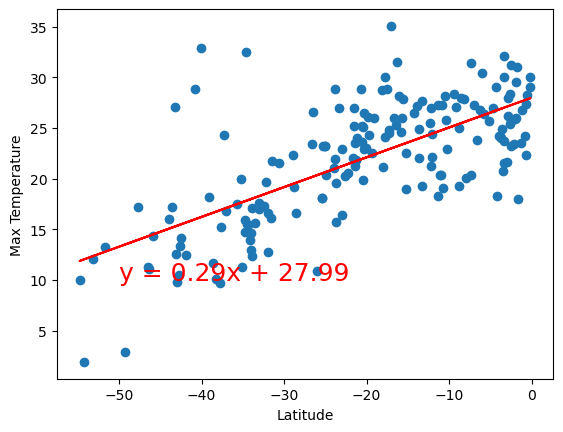

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
y_axis = 'Max Temperature'

lin_regress_plot(x_values,y_values, y_axis)

**Discussion about the linear relationship:** 
The r-value of the Northern Hemisphere is -0.870 and the r-value of the Southern Hemisphere is 0.688. The positive one indicates that there is a positive correlation between Max Temp and Latitude, meaning that the higher the latitude, the higher the temperature. The negative one indicated and that there is a negative correlation, meaning when latitude goes down, temperature tend to go up.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2523759430245087


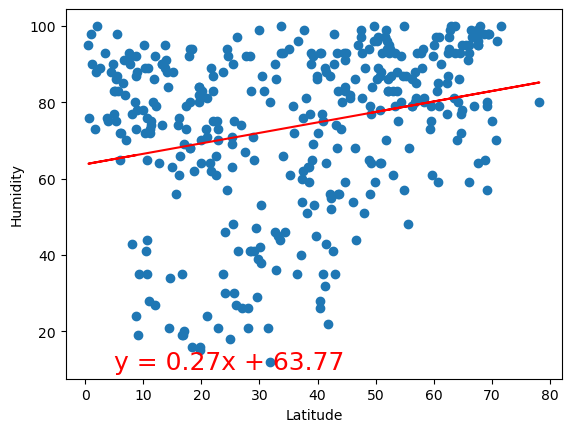

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
y_axis = 'Humidity'

lin_regress_plot(x_values,y_values, y_axis)

The r-value is: 0.1244551872407978


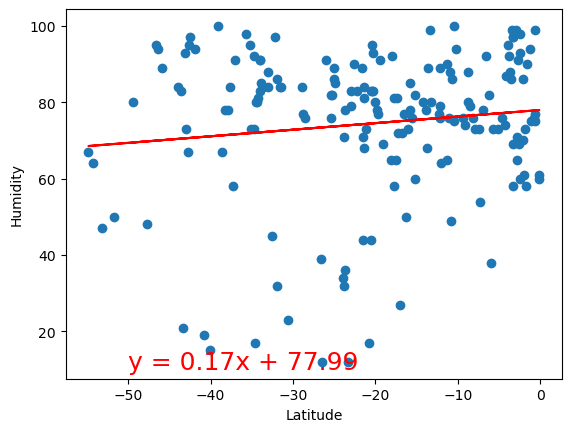

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
y_axis = 'Humidity'

lin_regress_plot(x_values,y_values, y_axis)

**Discussion about the linear relationship:** 
In this case, both r-values are relativelly small (0.25 and 0.12), or closer to zero. In this case, we can say that there is not much correlation between Latitude and Humidity in the Northern and Southern Hemisphere.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.19633222110730802


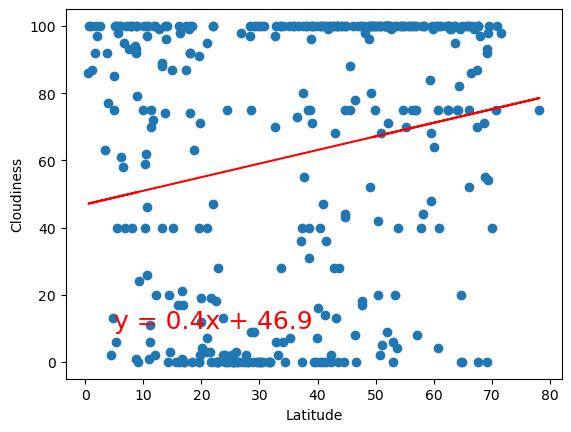

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
y_axis = 'Cloudiness'

lin_regress_plot(x_values,y_values, y_axis)

The r-value is: 0.026458552122580824


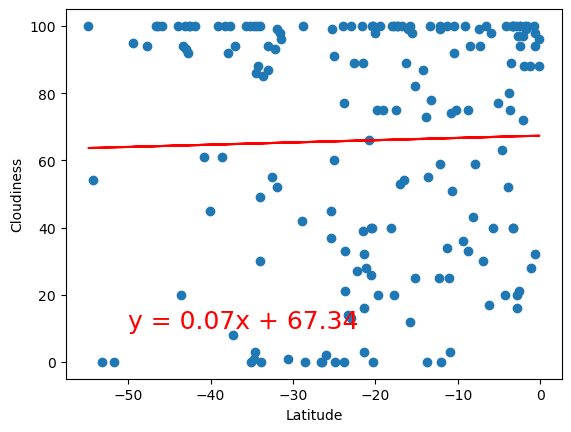

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
y_axis = 'Cloudiness'

lin_regress_plot(x_values,y_values, y_axis)

**Discussion about the linear relationship:** 
In this case, both r-values are relativelly small (0.19 and 0.02), or closer to zero. In both cases, we can say that there is not much correlation between Latitude and Cloudiness in the Northern and Southern Hemisphere, but when one increase the other slightly increases too.   

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2058215373430351


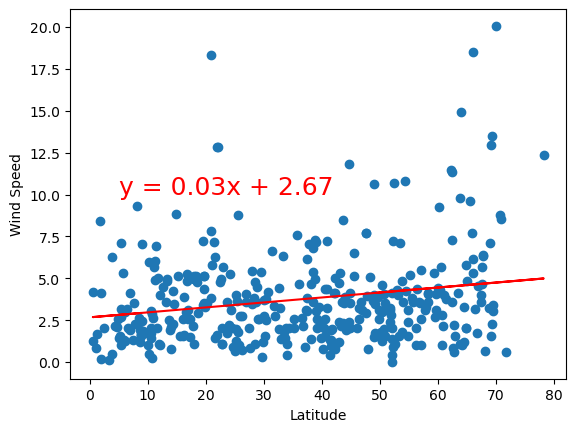

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
y_axis = 'Wind Speed'

lin_regress_plot(x_values,y_values, y_axis)

The r-value is: -0.23110942244685528


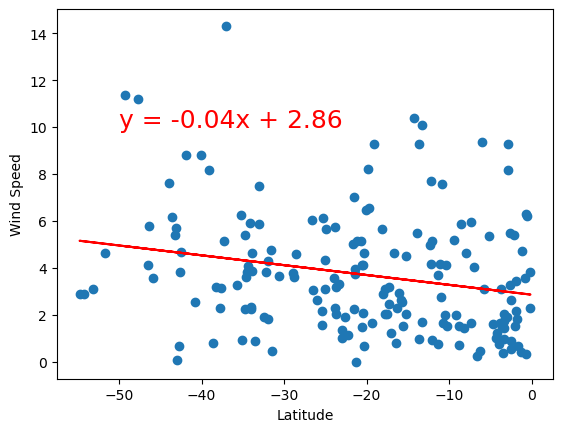

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
y_axis = 'Wind Speed'

lin_regress_plot(x_values,y_values, y_axis)

**Discussion about the linear relationship:** 

In this case, both r-values are relativelly small (0.20 and -0.23), or closer to zero. In both cases, we can say that there is not much correlation between Latitude and Windspeed in the Northern and Southern Hemisphere, but when Latitude increases, windspeed decreases. 